In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer


# Load Data

In [2]:
file_path = "office_group.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Extract Date, Time, Name, and Message

In [3]:
data = []
pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2} [APM]{2}) - (.*?): (.*)$'
for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        date, time, name, message = match.groups()
        data.append([date, time, name, message])

# Create DataFrame

In [4]:
df = pd.DataFrame(data, columns=["Date", "Time", "Name", "Message"])

# Display first 5 rows

In [5]:
df.head()

,Date,Time,Name,Message


# Sentiment Analysis Function

In [6]:
def sentimental_analysis(data, columnname='Message'):
    sid = SentimentIntensityAnalyzer()
    data = data.dropna()
    data['scores'] = data[columnname].apply(lambda text: sid.polarity_scores(text))
    data['compound'] = data['scores'].apply(lambda score: score['compound'])
    data['Sentiment'] = data['compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    return data['Sentiment'].value_counts(), data

# Perform Sentiment Analysis

In [7]:
pos, data_Senti = sentimental_analysis(df, columnname='Message')

# Display Sentiment Data

In [8]:
data_Senti.head()

,Date,Time,Name,Message,scores,compound,Sentiment


# Plot Sentiment Distribution

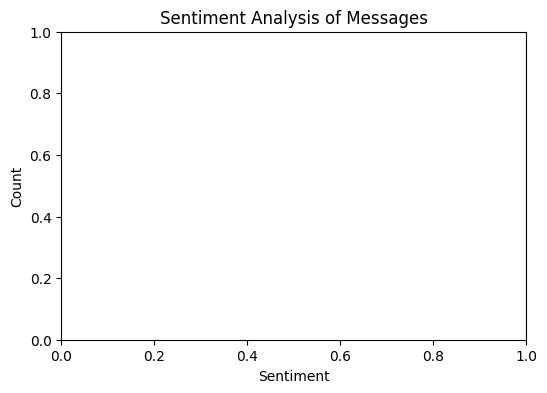

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x=pos.index, y=pos.values, palette=['#2ca02c', '#d62728', '#1f77b4'])
plt.title('Sentiment Analysis of Messages')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Find Missed Calls

In [10]:
missed_call_placeholder = 'Missed call'
missed_calls = df[df['Message'].str.contains(missed_call_placeholder, na=False)]
missed_call_counts = missed_calls['Name'].value_counts()

# Display Missed Calls Data

In [11]:
missed_calls.head()

,Date,Time,Name,Message


# Plot Missed Calls

In [12]:
if not missed_call_counts.empty:
    plt.figure(figsize=(8, 5))
    missed_call_counts.plot(kind='bar', color='orange')
    plt.title('Missed Calls by User')
    plt.xlabel('User')
    plt.ylabel('Missed Call Count')
    plt.show()
else:
    print("No missed calls found in the dataset.")

No missed calls found in the dataset.


# Flirty Words List

In [13]:
flirty_keywords = [
    "baby", "babe", "sweetheart", "cutie", "handsome", "gorgeous", "hot",
    "darling", "dear", "love", "kiss", "hug", "😘", "😍", "💋", "❤️", "date",
    "romantic", "beautiful", "wink", "sugar", "honey", "flirt"
]

# Function to Detect Flirty Messages

In [14]:
def detect_flirty_messages(data, columnname='Message'):
    data['Flirty'] = data[columnname].apply(
        lambda x: any(word.lower() in x.lower() for word in flirty_keywords)
    )
    return data

# Apply Flirty Detection

In [15]:
df = detect_flirty_messages(df, columnname='Message')

# Count Flirty vs Non-Flirty Messages

In [16]:
flirty_counts = df['Flirty'].value_counts()

df.head()

,Date,Time,Name,Message,Flirty


# Plot Flirty Message Distribution

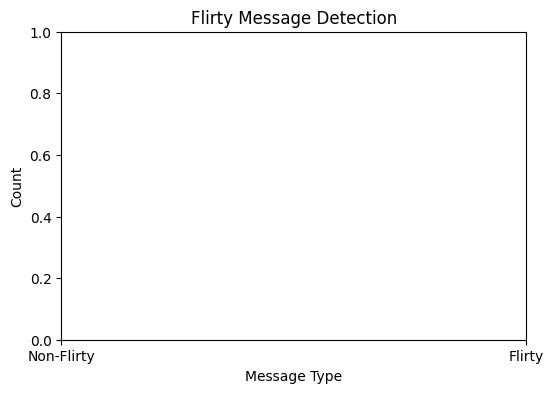

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x=flirty_counts.index, y=flirty_counts.values, palette=['#1f77b4', '#d62728'])
plt.xticks(ticks=[0, 1], labels=['Non-Flirty', 'Flirty'])
plt.title('Flirty Message Detection')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Display Only Flirty Messages

In [18]:
flirty_messages = df[df['Flirty'] == True]
flirty_messages[['Name', 'Message']].head(10)

,Name,Message
